In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from itertools import combinations
from sklearn.datasets import make_circles

In [ ]:
def pairwise_distances(X):
    return np.linalg.norm(X[:, None, :] - X[None, :, :], axis=-1)

In [ ]:
n, d = 20, 2
idx_triu = np.triu_indices(n, k=1)

#### Point cloud

In [ ]:
X = np.random.normal(size=(n, d))
X, _ = make_circles(n_samples=(n, 0), noise=0.15, random_state=42)
X

array([[ 1.21935672,  0.23080725],
       [ 0.22191938, -0.71850081],
       [-0.0376566 , -1.02458007],
       [ 0.72960706,  0.53206414],
       [-0.81268527,  0.64111795],
       [ 0.06255167,  1.12486928],
       [-0.99506639, -0.31349278],
       [ 0.60205412,  0.90871515],
       [ 0.78798422, -0.59276426],
       [ 0.19665552, -1.06781382],
       [-0.44545882, -0.57188941],
       [ 0.75379135,  0.64411995],
       [-1.13003025,  0.24765921],
       [ 0.8840453 , -0.08038075],
       [ 0.35746696,  0.74204398],
       [-1.13576713, -0.74436971],
       [-0.5618812 ,  0.85764681],
       [-0.88812107, -0.27548749],
       [-0.22434736, -0.94723142],
       [-0.23803801,  1.04993511]])

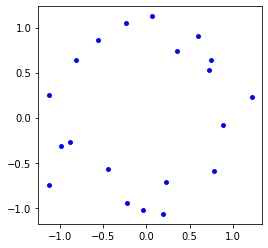

In [ ]:
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c="b", s=15)
plt.show()

#### Pairwise distances

In [ ]:
A = pairwise_distances(X)
A

array([[0.        , 1.3769775 , 1.77653589, 0.57498734, 2.07305319,
        1.46203449, 2.28033599, 0.9168542 , 0.92970547, 1.65297744,
        1.8482242 , 0.62255803, 2.34944741, 0.45746226, 1.00210625,
        2.54903481, 1.88831574, 2.16744019, 1.86334553, 1.67181633],
       [1.3769775 , 0.        , 0.40132804, 1.34968866, 1.70849933,
        1.8502463 , 1.28260901, 1.67102788, 0.57986126, 0.35022541,
        0.68329245, 1.46274507, 1.66169582, 0.91956943, 1.46682113,
        1.35793294, 1.76027971, 1.19517806, 0.50146953, 1.82727294],
       [1.77653589, 0.40132804, 0.        , 1.73546383, 1.837177  ,
        2.15178395, 1.19259324, 2.03638409, 0.93174441, 0.23826733,
        0.60928769, 1.84687563, 1.67686403, 1.3194873 , 1.81027156,
        1.1332981 , 1.95386526, 1.13332675, 0.20207982, 2.08417032],
       [0.57498734, 1.34968866, 1.73546383, 0.        , 1.54614306,
        0.89240172, 1.92079801, 0.39766284, 1.12634223, 1.6863116 ,
        1.61229441, 0.11463588, 1.88125945, 0

In [ ]:
distances = A[idx_triu]
distances

array([1.3769775 , 1.77653589, 0.57498734, 2.07305319, 1.46203449,
       2.28033599, 0.9168542 , 0.92970547, 1.65297744, 1.8482242 ,
       0.62255803, 2.34944741, 0.45746226, 1.00210625, 2.54903481,
       1.88831574, 2.16744019, 1.86334553, 1.67181633, 0.40132804,
       1.34968866, 1.70849933, 1.8502463 , 1.28260901, 1.67102788,
       0.57986126, 0.35022541, 0.68329245, 1.46274507, 1.66169582,
       0.91956943, 1.46682113, 1.35793294, 1.76027971, 1.19517806,
       0.50146953, 1.82727294, 1.73546383, 1.837177  , 2.15178395,
       1.19259324, 2.03638409, 0.93174441, 0.23826733, 0.60928769,
       1.84687563, 1.67686403, 1.3194873 , 1.81027156, 1.1332981 ,
       1.95386526, 1.13332675, 0.20207982, 2.08417032, 1.54614306,
       0.89240172, 1.92079801, 0.39766284, 1.12634223, 1.6863116 ,
       1.61229441, 0.11463588, 1.88125945, 0.6316169 , 0.42729356,
       2.26028853, 1.33189564, 1.80808847, 1.76021146, 1.0975096 ,
       1.00002752, 0.9718768 , 1.43982492, 2.02104135, 1.98474

#### Filtration function

In [ ]:
def f(simplex, A):
    
    dim = len(simplex) - 1

    if dim==0:
        f = 0
    elif dim==1:
        i, j = simplex
        f = A[i,j]
    else:
        i, j, k = simplex
        f = max([A[i,j], A[i,k], A[j,k]])
        
    return f

In [ ]:
vertices = list(combinations(range(n), 1))

for vertex in vertices:
    i = vertex
    print(i, 0)

(0,) 0
(1,) 0
(2,) 0
(3,) 0
(4,) 0
(5,) 0
(6,) 0
(7,) 0
(8,) 0
(9,) 0
(10,) 0
(11,) 0
(12,) 0
(13,) 0
(14,) 0
(15,) 0
(16,) 0
(17,) 0
(18,) 0
(19,) 0


In [ ]:
pairs = list(combinations(range(n), 2))

for pair in pairs:
    i, j = pair
    print((i, j), A[i,j])

(0, 1) 1.3769774972764166
(0, 2) 1.7765358916732061
(0, 3) 0.5749873397139794
(0, 4) 2.073053187854305
(0, 5) 1.4620344890004124
(0, 6) 2.2803359863950403
(0, 7) 0.916854197456107
(0, 8) 0.9297054695694815
(0, 9) 1.6529774387265888
(0, 10) 1.8482242024032036
(0, 11) 0.6225580284568795
(0, 12) 2.349447406884872
(0, 13) 0.4574622585197277
(0, 14) 1.002106253009486
(0, 15) 2.5490348069359023
(0, 16) 1.888315743467567
(0, 17) 2.1674401898188
(0, 18) 1.8633455257301084
(0, 19) 1.6718163287310204
(1, 2) 0.4013280433788543
(1, 3) 1.3496886580493395
(1, 4) 1.7084993291742108
(1, 5) 1.8502462954547292
(1, 6) 1.2826090071602376
(1, 7) 1.6710278840485582
(1, 8) 0.5798612613112394
(1, 9) 0.35022541242821936
(1, 10) 0.6832924487793803
(1, 11) 1.4627450652490348
(1, 12) 1.661695816877302
(1, 13) 0.9195694321800959
(1, 14) 1.4668211270598985
(1, 15) 1.3579329377637315
(1, 16) 1.7602797118399354
(1, 17) 1.1951780636226343
(1, 18) 0.5014695323541222
(1, 19) 1.8272729378081474
(2, 3) 1.7354638293164026


In [ ]:
triples = list(combinations(range(n), 3))

for triple in triples:
    i, j, k = triple
    print((i, j, k), max([A[i,j], A[i,k], A[j,k]]))

(0, 1, 2) 1.7765358916732061
(0, 1, 3) 1.3769774972764166
(0, 1, 4) 2.073053187854305
(0, 1, 5) 1.8502462954547292
(0, 1, 6) 2.2803359863950403
(0, 1, 7) 1.6710278840485582
(0, 1, 8) 1.3769774972764166
(0, 1, 9) 1.6529774387265888
(0, 1, 10) 1.8482242024032036
(0, 1, 11) 1.4627450652490348
(0, 1, 12) 2.349447406884872
(0, 1, 13) 1.3769774972764166
(0, 1, 14) 1.4668211270598985
(0, 1, 15) 2.5490348069359023
(0, 1, 16) 1.888315743467567
(0, 1, 17) 2.1674401898188
(0, 1, 18) 1.8633455257301084
(0, 1, 19) 1.8272729378081474
(0, 2, 3) 1.7765358916732061
(0, 2, 4) 2.073053187854305
(0, 2, 5) 2.1517839545148214
(0, 2, 6) 2.2803359863950403
(0, 2, 7) 2.0363840945906597
(0, 2, 8) 1.7765358916732061
(0, 2, 9) 1.7765358916732061
(0, 2, 10) 1.8482242024032036
(0, 2, 11) 1.8468756305017382
(0, 2, 12) 2.349447406884872
(0, 2, 13) 1.7765358916732061
(0, 2, 14) 1.810271563895039
(0, 2, 15) 2.5490348069359023
(0, 2, 16) 1.9538652586176353
(0, 2, 17) 2.1674401898188
(0, 2, 18) 1.8633455257301084
(0, 2, 

#### Total order

In [ ]:
sigmas = []
cmplx = [item for lst in [vertices, pairs, triples] for item in lst]

for simplex in cmplx:
    dim = len(simplex)-1
    sigmas.append((simplex, dim, f(simplex, A)))
    
sigmas = sorted(sigmas, key=lambda x: (x[2], x[1], x[0]))
    
sigmas

[((0,), 0, 0),
 ((1,), 0, 0),
 ((2,), 0, 0),
 ((3,), 0, 0),
 ((4,), 0, 0),
 ((5,), 0, 0),
 ((6,), 0, 0),
 ((7,), 0, 0),
 ((8,), 0, 0),
 ((9,), 0, 0),
 ((10,), 0, 0),
 ((11,), 0, 0),
 ((12,), 0, 0),
 ((13,), 0, 0),
 ((14,), 0, 0),
 ((15,), 0, 0),
 ((16,), 0, 0),
 ((17,), 0, 0),
 ((18,), 0, 0),
 ((19,), 0, 0),
 ((6, 17), 1, 0.11349759350236929),
 ((3, 11), 1, 0.11463587710159195),
 ((2, 18), 1, 0.20207982334466337),
 ((2, 9), 1, 0.23826733415173798),
 ((7, 14), 1, 0.29597661391406055),
 ((7, 11), 1, 0.3050160765855277),
 ((5, 19), 1, 0.309789092718799),
 ((4, 16), 1, 0.33134186415067396),
 ((1, 9), 1, 0.35022541242821936),
 ((16, 19), 1, 0.37662873003012093),
 ((3, 7), 1, 0.3976628405015698),
 ((3, 7, 11), 2, 0.3976628405015698),
 ((1, 2), 1, 0.4013280433788543),
 ((1, 2, 9), 2, 0.4013280433788543),
 ((11, 14), 1, 0.40824274237248886),
 ((7, 11, 14), 2, 0.40824274237248886),
 ((3, 14), 1, 0.42729355808968944),
 ((3, 7, 14), 2, 0.42729355808968944),
 ((3, 11, 14), 2, 0.42729355808968944),

In [ ]:
filtered_complex = [item[0] for item in sigmas]

filtered_complex_to_idx = {}
idx_to_simplices = {}

for i, simplex in enumerate(filtered_complex):
    filtered_complex_to_idx[simplex] = i
    idx_to_simplices[i] = simplex

In [ ]:
filtered_complex_to_idx

{(0,): 0,
 (1,): 1,
 (2,): 2,
 (3,): 3,
 (4,): 4,
 (5,): 5,
 (6,): 6,
 (7,): 7,
 (8,): 8,
 (9,): 9,
 (10,): 10,
 (11,): 11,
 (12,): 12,
 (13,): 13,
 (14,): 14,
 (15,): 15,
 (16,): 16,
 (17,): 17,
 (18,): 18,
 (19,): 19,
 (6, 17): 20,
 (3, 11): 21,
 (2, 18): 22,
 (2, 9): 23,
 (7, 14): 24,
 (7, 11): 25,
 (5, 19): 26,
 (4, 16): 27,
 (1, 9): 28,
 (16, 19): 29,
 (3, 7): 30,
 (3, 7, 11): 31,
 (1, 2): 32,
 (1, 2, 9): 33,
 (11, 14): 34,
 (7, 11, 14): 35,
 (3, 14): 36,
 (3, 7, 14): 37,
 (3, 11, 14): 38,
 (10, 18): 39,
 (9, 18): 40,
 (2, 9, 18): 41,
 (6, 15): 42,
 (0, 13): 43,
 (5, 14): 44,
 (1, 18): 45,
 (1, 2, 18): 46,
 (1, 9, 18): 47,
 (4, 12): 48,
 (8, 13): 49,
 (15, 17): 50,
 (6, 15, 17): 51,
 (10, 17): 52,
 (0, 3): 53,
 (12, 17): 54,
 (6, 12): 55,
 (6, 12, 17): 56,
 (1, 8): 57,
 (5, 7): 58,
 (5, 7, 14): 59,
 (6, 10): 60,
 (6, 10, 17): 61,
 (2, 10): 62,
 (2, 10, 18): 63,
 (0, 11): 64,
 (0, 3, 11): 65,
 (3, 13): 66,
 (0, 3, 13): 67,
 (14, 19): 68,
 (5, 14, 19): 69,
 (5, 16): 70,
 (5, 16, 19)

In [ ]:
idx_to_simplices

{0: (0,),
 1: (1,),
 2: (2,),
 3: (3,),
 4: (4,),
 5: (5,),
 6: (6,),
 7: (7,),
 8: (8,),
 9: (9,),
 10: (10,),
 11: (11,),
 12: (12,),
 13: (13,),
 14: (14,),
 15: (15,),
 16: (16,),
 17: (17,),
 18: (18,),
 19: (19,),
 20: (6, 17),
 21: (3, 11),
 22: (2, 18),
 23: (2, 9),
 24: (7, 14),
 25: (7, 11),
 26: (5, 19),
 27: (4, 16),
 28: (1, 9),
 29: (16, 19),
 30: (3, 7),
 31: (3, 7, 11),
 32: (1, 2),
 33: (1, 2, 9),
 34: (11, 14),
 35: (7, 11, 14),
 36: (3, 14),
 37: (3, 7, 14),
 38: (3, 11, 14),
 39: (10, 18),
 40: (9, 18),
 41: (2, 9, 18),
 42: (6, 15),
 43: (0, 13),
 44: (5, 14),
 45: (1, 18),
 46: (1, 2, 18),
 47: (1, 9, 18),
 48: (4, 12),
 49: (8, 13),
 50: (15, 17),
 51: (6, 15, 17),
 52: (10, 17),
 53: (0, 3),
 54: (12, 17),
 55: (6, 12),
 56: (6, 12, 17),
 57: (1, 8),
 58: (5, 7),
 59: (5, 7, 14),
 60: (6, 10),
 61: (6, 10, 17),
 62: (2, 10),
 63: (2, 10, 18),
 64: (0, 11),
 65: (0, 3, 11),
 66: (3, 13),
 67: (0, 3, 13),
 68: (14, 19),
 69: (5, 14, 19),
 70: (5, 16),
 71: (5, 16,

#### Boundary matrix

In [ ]:
def low(column):
    column = (column!=0).astype(int)
    argwhere = np.argwhere(column)
    if argwhere.shape[0]==0:
        lowest = -1
    else:
        lowest = argwhere[-1,0]
    
    return lowest

In [ ]:
def boundary(simplex):
    simplex_dim = len(simplex) - 1
    
    if simplex_dim==0:
        faces = []
    else:
        faces = list(combinations(simplex, simplex_dim))
    
    return faces

In [ ]:
n_simplices = len(filtered_complex)

In [ ]:
B = np.zeros((n_simplices, n_simplices), dtype=int)
B.shape

(1350, 1350)

In [ ]:
lows_to_idx = {} # row_i -> j
for i in range(-1, n_simplices):
    lows_to_idx[i] = {}

idx_to_lows = {} # j -> low_i

for simplex in filtered_complex:
    faces = boundary(simplex)
    j = filtered_complex_to_idx[simplex]
    
    for k, face in enumerate(faces):
        i = filtered_complex_to_idx[face]
        #print(i,j)
        B[i,j] = 1
        
    low_i = low(B[:,j])
    

In [ ]:
B

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
filtered_complex

[(0,),
 (1,),
 (2,),
 (3,),
 (4,),
 (5,),
 (6,),
 (7,),
 (8,),
 (9,),
 (10,),
 (11,),
 (12,),
 (13,),
 (14,),
 (15,),
 (16,),
 (17,),
 (18,),
 (19,),
 (6, 17),
 (3, 11),
 (2, 18),
 (2, 9),
 (7, 14),
 (7, 11),
 (5, 19),
 (4, 16),
 (1, 9),
 (16, 19),
 (3, 7),
 (3, 7, 11),
 (1, 2),
 (1, 2, 9),
 (11, 14),
 (7, 11, 14),
 (3, 14),
 (3, 7, 14),
 (3, 11, 14),
 (10, 18),
 (9, 18),
 (2, 9, 18),
 (6, 15),
 (0, 13),
 (5, 14),
 (1, 18),
 (1, 2, 18),
 (1, 9, 18),
 (4, 12),
 (8, 13),
 (15, 17),
 (6, 15, 17),
 (10, 17),
 (0, 3),
 (12, 17),
 (6, 12),
 (6, 12, 17),
 (1, 8),
 (5, 7),
 (5, 7, 14),
 (6, 10),
 (6, 10, 17),
 (2, 10),
 (2, 10, 18),
 (0, 11),
 (0, 3, 11),
 (3, 13),
 (0, 3, 13),
 (14, 19),
 (5, 14, 19),
 (5, 16),
 (5, 16, 19),
 (1, 10),
 (1, 2, 10),
 (1, 10, 18),
 (4, 19),
 (4, 16, 19),
 (10, 15),
 (6, 10, 15),
 (10, 15, 17),
 (11, 13),
 (0, 11, 13),
 (3, 11, 13),
 (8, 9),
 (1, 8, 9),
 (9, 10),
 (1, 9, 10),
 (2, 9, 10),
 (9, 10, 18),
 (12, 16),
 (4, 12, 16),
 (5, 11),
 (5, 7, 11),
 (5, 11, 14),

# NumPy version

In [34]:
import numpy as np

import time
from itertools import combinations, groupby
from bisect import bisect
from operator import attrgetter

from dataclasses import dataclass
from dataclasses import astuple, asdict

from typing import Tuple, Dict, List

@dataclass
class Simplex:
    vertices: Tuple[int]
    index: int = None
    time: float = None
    weight: float = None

    def __repr__(self):
        return "({})".format(", ".join(map(str, self.vertices)))

    @property
    def dim(self):
        return len(self.vertices) - 1

    @property
    def boundary(self):
        if self.dim==0:
            faces = []
        else:
            faces = [Simplex(item) for item in combinations(self.vertices, self.dim)][::-1]
        return faces

@dataclass
class PersistenceRepresentative:
    birth_simplex: Simplex
    death_simplex: Simplex

@dataclass
class PersistenceDiagram:
    elements: List[PersistenceRepresentative]

    def num_representatives(self, dim=0):
        n_representatives = {0: 0, 1: 0}

        for representative in self.elements:
            representative_dim = representative.birth_simplex.dim
            n_representatives[representative_dim] = n_representatives[representative_dim] + 1

        return n_representatives[dim]

    def representatives_graded(self, k=0):

        representatives_graded = {}

        representatives = sorted(self.elements, key=lambda element: (element.birth_simplex.dim)) # , element.birth_simplex.index, element.death_simplex.index

        for k_repr, k_representatives in groupby(representatives, key=lambda representative: representative.birth_simplex.dim):
            k_representatives = list(k_representatives)
            representatives_graded[k_repr] = k_representatives

        return representatives_graded[k]

    def as_numpy(self, index=False):
        pd = np.zeros((len(self.elements), 3))
        
        sorted_elements = sorted(self.elements, key=lambda element: (element.birth_simplex.dim, element.birth_simplex.index, element.death_simplex.index))

        for i, element in enumerate(sorted_elements):
            if index==False:
                pd[i,:] = np.array([element.birth_simplex.dim, element.birth_simplex.time, element.death_simplex.time])
            else:
                pd[i,:] = np.array([element.birth_simplex.dim, element.birth_simplex.index, element.death_simplex.index])

        return pd#.astype(int)

class FilteredComplex:

    def __init__(self, filtration: List[Simplex], oriented=False):
        self.filtration = filtration
        self.oriented = oriented
        self.boundary_matrix = None
        self.reduced_boundary_matrix = None
        self.persistence_diagram = None

        self.simplex_to_index = {}
        for simplex in self.filtration:
            self.simplex_to_index[simplex.vertices] = simplex.index

        n_simplices = len(self.filtration)
        self.boundary_matrix = np.zeros((n_simplices, n_simplices), dtype=int)

        # building boundary matrix
        for simplex in self.filtration:
            for q, face in enumerate(simplex.boundary):
                i, j = self.simplex_to_index[face.vertices], simplex.index
                self.boundary_matrix[i,j] = 1

    def get_reduced_boundary_matrix(self):
        
        def matrix_reduction(matrix: np.ndarray) -> np.ndarray:
            
            def low(column: np.ndarray) -> int:
                if np.any(column!=0):
                    return np.flatnonzero(column)[-1] 
                return -1

            def reduceable(matrix, j, lows, pivots):
                is_reduceable = False
                if lows[j]!=-1 and pivots[lows[j]]!=-1:
                    is_reduceable = pivots[lows[j]]<j
                return is_reduceable
            
            t0 = time.time()
            # set lows and pivots
            lows = [low(column) for column in matrix.T]
            
            pivots = np.ones(matrix.shape[0]).astype(int) * -1
            for i in range(matrix.shape[0]):
                for j in range(i+1, matrix.shape[0]):
                    if (matrix[i,j]!=0 and lows[j]==i):
                        pivots[i] = j
                        break
            # print(time.time() - t0)
            
            t0 = time.time()
            pivots = list(pivots)
            for i in range(0, matrix.shape[1]):
                while reduceable(matrix, i, lows, pivots):
                    j = pivots[lows[i]]
                    matrix[:,i] = (matrix[:,j] + matrix[:,i]) % 2
                    lows[i] = low(matrix[:,i]) # update lows
                
                if lows[i]!=-1:
                    pivots[lows[i]] = i; # update pivots
            # print(time.time() - t0)
                    
            return matrix

        if (self.reduced_boundary_matrix is None): # cached
            self.reduced_boundary_matrix = matrix_reduction(self.boundary_matrix)
            # self.persistence_diagram = self.get_persistence_diagram()

        return self.reduced_boundary_matrix

    def view_boundary_matrix(self, index=None, order=1):
        
        self.simplices_at_index = {}
        self.simplices_index_idx = {}

        filtration_index = sorted(self.filtration[:index+1], key=lambda simplex: (len(simplex.vertices), simplex.index))
        for k, k_simplices in groupby(filtration_index, key=lambda simplex: len(simplex.vertices)):
            k_simplices = list(k_simplices)
            self.simplices_at_index[k-1] = k_simplices
            self.simplices_index_idx[k-1] = [simplex.index for simplex in k_simplices]

        if order==1:
            B = self.oriented_boundary_matrix[self.simplices_index_idx[0],:][:,self.simplices_index_idx[1]]
        elif order==2:
            B = self.oriented_boundary_matrix[self.simplices_index_idx[1],:][:,self.simplices_index_idx[2]]

        return B

    def get_persistence_diagram(self):
        def low(column):
            column = (column!=0).astype(int)
            argwhere = np.argwhere(column)
            if argwhere.shape[0]==0:
                lowest = -1
            else:
                lowest = argwhere[-1,0]
            return lowest

        persistence_representatives = []
        for j in range(len(self.filtration)):
            i_low = low(self.reduced_boundary_matrix[:,j])
            if i_low!=-1:
                birth_simplex, death_simplex = self.filtration[i_low], self.filtration[j]
                if (death_simplex.index - birth_simplex.index) > 1:
                    persistence_representative = PersistenceRepresentative(birth_simplex, death_simplex)
                    persistence_representatives.append(persistence_representative)

        return PersistenceDiagram(persistence_representatives)

    @property
    def harmonic_persistence_diagram(self):
        pass

class IndexFiltration:
    
    def __init__(self, cmplx):
        self.cmplx = cmplx

    def __call__(self, identity=False):
        
        if identity==False:
            filtered_cmplx = sorted(self.cmplx, key=lambda simplex: (simplex.index, simplex.vertices))
        else: # if identity - set index and time as they passed
            filtered_cmplx = self.cmplx
            for i, simplex in enumerate(filtered_cmplx):
                simplex.index = i

        for simplex in filtered_cmplx:
            simplex.time = simplex.index

        return FilteredComplex(filtered_cmplx)

class VietorisRipsFiltration:
    
    def __init__(self, X, distance_matrix=False):
        def pairwise_distances(X):
            return np.linalg.norm(X[:, None, :] - X[None, :, :], axis=-1)

        if (distance_matrix):
            self.X = X
        else:
            self.X = pairwise_distances(X)

        self.n_vertices = X.shape[0]

    def __call__(self):
        def f(simplex):
            if simplex.dim==0:
                f = 0
            elif simplex.dim==1:
                i, j = simplex.vertices
                f = self.X[i,j]
            else:
                i, j, k = simplex.vertices
                f = max([self.X[i,j], self.X[i,k], self.X[j,k]])
            return f

        # TODO: refactor
        vertices = [Simplex(item) for item in combinations(range(self.n_vertices), 1)]
        edges = [Simplex(item) for item in combinations(range(self.n_vertices), 2)]
        triangles = [Simplex(item) for item in combinations(range(self.n_vertices), 3)]
        cmplx = [item for lst in [vertices, edges, triangles] for item in lst]

        for simplex in cmplx:
            simplex.time = f(simplex)

        filtered_cmplx = sorted(cmplx, key=lambda simplex: (simplex.time, simplex.dim, simplex.vertices))

        for i, simplex in enumerate(filtered_cmplx):
            simplex.index = i

        return FilteredComplex(filtered_cmplx)

In [35]:
cloud1 = np.random.randn(20, 10)
cloud2 = np.random.randn(20, 10)

In [36]:
import time
t0 = time.time()
barc = VietorisRipsFiltration(cloud1)()
print(time.time() - t0)

0.008058786392211914


In [37]:
t0 = time.time()
barc.get_reduced_boundary_matrix()
print(time.time() - t0)

0.24260950088500977


In [38]:
t0 = time.time()
barc.get_persistence_diagram().as_numpy()
print(time.time() - t0)

0.012668371200561523


In [40]:
from ripser import ripser

In [41]:
ripser(cloud1)['dgms']

[array([[0.        , 1.97354317],
        [0.        , 2.00263047],
        [0.        , 2.04324102],
        [0.        , 2.11252642],
        [0.        , 2.12036419],
        [0.        , 2.29703283],
        [0.        , 2.38572741],
        [0.        , 2.38801169],
        [0.        , 2.40740585],
        [0.        , 2.45936656],
        [0.        , 2.72796679],
        [0.        , 2.73919749],
        [0.        , 2.7594595 ],
        [0.        , 2.85893655],
        [0.        , 2.94371986],
        [0.        , 3.22633338],
        [0.        , 3.31528974],
        [0.        , 3.41085625],
        [0.        , 3.55512404],
        [0.        ,        inf]]),
 array([[3.36920309, 3.43974566],
        [2.9860785 , 3.29701471],
        [2.83171391, 2.86610675],
        [2.55396271, 2.67745852],
        [2.48277783, 2.77688313]])]

The python code is correct

In [42]:
%%timeit

barc = VietorisRipsFiltration(cloud1)()
barc.get_reduced_boundary_matrix()
barc.get_persistence_diagram().as_numpy()

257 ms ± 6.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# CuPy version

In [43]:
import numpy as np
import cupy as cp
import cupyx as cpx
from cupyx.scipy.sparse import csr_matrix

from itertools import combinations, groupby
from bisect import bisect
from operator import attrgetter

from dataclasses import dataclass
from dataclasses import astuple, asdict

from typing import Tuple, Dict, List


# class SparseMatrix:

#     def __init__(self, shape, dtype):
#         self.row_matrix = dict()
#         self.col_matrix = dict()
#         self.transposed = False
#         assert len(shape) == 2 and isinstance(shape[0], int) and isinstance(shape[1], int)
#         self.shape = tuple(shape)
#         self.dtype = dtype

#     def __getitem__(self, ind):

#         i, j = ind
#         row, col = (i, j) if not self.transposed else (j, i)
#         assert row < self.shape[0] and col < self.shape[1]
#         if isinstance(row, int) and isinstance(col, int):
#             if row in self.row_matrix and col in self.row_matrix[row]:
#                 return self.row_matrix[row][col]
#             else:
#                 return 0
#         elif isinstance(row, slice) and isinstance(col, int):
#             if col in self.col_matrix:
#                 arr = cp.zeros((row.end - row.start,))
#                 for r in range(row.start, row.end):
#                     for c, v in self.row_matrix.items():
#                         if c == col: arr[r - row.start] = v
#                 return arr
#             else:
#                 return cp.zeros((row.end - row.start,))
#         elif isinstance(row, int) and isinstance(col, slice):
#             if row in self.row_matrix:
#                 arr = cp.zeros((col.end - col.start,))
#                 for c in range(col.start, col.end):
#                     for r, v in self.col_matrix.items():
#                         if r == row: arr[c - col.start] = v
#                 return arr
#             else:
#                 return cp.zeros((col.end - col.start,))
#         elif isinstance(row, slice) and isinstance(col, slice):
#             raise Exception(f'Not implemented yet')
#         else:
#             raise Exception(f'Index type must be int or slice, not ({i.type, j.type})')

#     def __setitem__(self, ind, value):
#         i, j = ind
#         row, col = (i, j) if not self.transposed else (j, i)
#         assert row < self.shape[0] and col < self.shape[1]
#         assert isinstance(value, self.dtype)
#         if isinstance(row, int) and isinstance(col, int):
#             if not row in self.row_matrix:
#                 self.row_matrix[row] = dict()
#             if not col in self.col_matrix:
#                 self.col_matrix[col] = dict()
#             self.row_matrix[row][col] = value
#             self.col_matrix[col][row] = value
#         elif isinstance(row, slice) and isinstance(col, int):
#             assert len(value) == self.shape[0]
#             if not col in self.col_matrix:
#                 self.col_matrix[col] = dict()
#             for i in range(row.start, row.end):
#                 v = value[i - row.start]
#                 if v != 0:
#                     self.col_matrix[col][i] = v
#                     if i not in self.row_matrix:
#                         self.row_matrix[i] = dict()
#                     self.row_matrix[i][col] = v
#         elif isinstance(row, int) and isinstance(col, slice):
#             assert len(value) == self.shape[1]
#             if not row in self.row_matrix:
#                 self.row_matrix[row] = dict()
#             for i in range(row.start, row.end):
#                 v = value[i - row.start]
#                 if v != 0:
#                     self.row_matrix[row][i] = v
#                     if i not in self.col_matrix:
#                         self.col_matrix[i] = dict()
#                     self.col_matrix[i][row] = v
#         elif isinstance(row, slice) and isinstance(col, slice):
#             pass
#         else:
#             raise Exception(f'Index type must be int or slice, not ({i.type, j.type})')

#     def transpose(self):
#         self.transposed = not self.transposed

@dataclass
class Simplex:
    vertices: Tuple[int]
    index: int = None
    time: float = None
    weight: float = None

    def __repr__(self):
        return "({})".format(", ".join(map(str, self.vertices)))

    @property
    def dim(self):
        return len(self.vertices) - 1

    @property
    def boundary(self):
        if self.dim==0:
            faces = []
        else:
            faces = [Simplex(item) for item in combinations(self.vertices, self.dim)][::-1]
        return faces

@dataclass
class PersistenceRepresentativeCupy:
    birth_simplex: Simplex
    death_simplex: Simplex

@dataclass
class PersistenceDiagramCupy:
    elements: List[PersistenceRepresentativeCupy]

    def num_representatives(self, dim=0):
        n_representatives = {0: 0, 1: 0}

        for representative in self.elements:
            representative_dim = representative.birth_simplex.dim
            n_representatives[representative_dim] = n_representatives[representative_dim] + 1

        return n_representatives[dim]

    def representatives_graded(self, k=0):

        representatives_graded = {}

        representatives = sorted(self.elements, key=lambda element: (element.birth_simplex.dim)) # , element.birth_simplex.index, element.death_simplex.index

        for k_repr, k_representatives in groupby(representatives, key=lambda representative: representative.birth_simplex.dim):
            k_representatives = list(k_representatives)
            representatives_graded[k_repr] = k_representatives

        return representatives_graded[k]

    def as_numpy(self, index=False):
        pd = np.zeros((len(self.elements), 3))
        
        sorted_elements = sorted(self.elements, key=lambda element: (element.birth_simplex.dim, element.birth_simplex.index, element.death_simplex.index))

        for i, element in enumerate(sorted_elements):
            if index==False:
                pd[i,:] = np.array([element.birth_simplex.dim, element.birth_simplex.time, element.death_simplex.time])
            else:
                pd[i,:] = np.array([element.birth_simplex.dim, element.birth_simplex.index, element.death_simplex.index])

        return pd#.astype(int)

class FilteredComplexCupy:

    def __init__(self, filtration: List[Simplex], oriented=False):
        self.filtration = filtration
        self.oriented = oriented
        self.boundary_matrix = None
        self.reduced_boundary_matrix = None
        self.persistence_diagram = None

        self.simplex_to_index = {}
        for simplex in self.filtration:
            self.simplex_to_index[simplex.vertices] = simplex.index

        n_simplices = len(self.filtration)
        self.boundary_matrix = cp.zeros((n_simplices, n_simplices), dtype=int)

        # building boundary matrix
        for simplex in self.filtration:
            for q, face in enumerate(simplex.boundary):
                i, j = self.simplex_to_index[face.vertices], simplex.index
                self.boundary_matrix[i,j] = 1

    def get_reduced_boundary_matrix(self):
        
        def matrix_reduction(matrix):
            
            def low(column):
                nz = np.flatnonzero(column)
                if len(nz) > 0:
                    return int(nz[-1])
                return -1

            def reduceable(matrix, j, lows, pivots):
                is_reduceable = False
                if lows[j] != -1 and pivots[int(lows[j])] != -1:
                    is_reduceable = pivots[int(lows[j])] < j
                return is_reduceable
            
            # set lows and pivots
            lows = cp.array([low(column) for column in matrix.T])
            
            pivots = cp.ones(matrix.shape[0]) * -1
            mat_inds = (matrix != 0).astype(bool) & (lows.reshape((1, -1)) == cp.arange(len(lows)).reshape((-1, 1)))
            mat_inds = cp.flatnonzero(mat_inds)
            row = mat_inds // matrix.shape[0]
            col = mat_inds % matrix.shape[0]
            pivots[row] = col
            del mat_inds
            
            pivots = pivots.get()
            matrix = matrix.get()
            lows = lows.get()
            
            for i in range(0, matrix.shape[1]):
                while reduceable(matrix, i, lows, pivots):
                    j = int(pivots[lows[i]])
                    matrix[:,i] = (matrix[:,j] + matrix[:,i]) % 2
                    lows[i] = low(matrix[:,i]) # update lows

                if lows[i] != -1:
                    pivots[int(lows[i])] = i; # update pivots
                    
            return matrix

        if (self.reduced_boundary_matrix is None): # cached
            self.reduced_boundary_matrix = matrix_reduction(self.boundary_matrix)
            # self.persistence_diagram = self.get_persistence_diagram()

        return self.reduced_boundary_matrix

    def view_boundary_matrix(self, index=None, order=1):
        
        self.simplices_at_index = {}
        self.simplices_index_idx = {}

        filtration_index = sorted(self.filtration[:index+1], key=lambda simplex: (len(simplex.vertices), simplex.index))
        for k, k_simplices in groupby(filtration_index, key=lambda simplex: len(simplex.vertices)):
            k_simplices = list(k_simplices)
            self.simplices_at_index[k-1] = k_simplices
            self.simplices_index_idx[k-1] = [simplex.index for simplex in k_simplices]

        if order == 1:
            B = self.oriented_boundary_matrix[self.simplices_index_idx[0],:][:,self.simplices_index_idx[1]]
        elif order == 2:
            B = self.oriented_boundary_matrix[self.simplices_index_idx[1],:][:,self.simplices_index_idx[2]]

        return B

    def get_persistence_diagram(self):
        def low(column):
            column = (column!=0).astype(int)
            argwhere = np.argwhere(column)
            if argwhere.shape[0]==0:
                lowest = -1
            else:
                lowest = argwhere[-1,0]
            return int(lowest)

        persistence_representatives = []
        for j in range(len(self.filtration)):
            i_low = low(self.reduced_boundary_matrix[:,j])
            if i_low!=-1:
                birth_simplex, death_simplex = self.filtration[i_low], self.filtration[j]
                if (death_simplex.index - birth_simplex.index) > 1:
                    persistence_representative = PersistenceRepresentativeCupy(birth_simplex, death_simplex)
                    persistence_representatives.append(persistence_representative)

        return PersistenceDiagramCupy(persistence_representatives)

    @property
    def harmonic_persistence_diagram(self):
        pass

class IndexFiltration:
    
    def __init__(self, cmplx):
        self.cmplx = cmplx

    def __call__(self, identity=False):
        
        if identity==False:
            filtered_cmplx = sorted(self.cmplx, key=lambda simplex: (simplex.index, simplex.vertices))
        else: # if identity - set index and time as they passed
            filtered_cmplx = self.cmplx
            for i, simplex in enumerate(filtered_cmplx):
                simplex.index = i

        for simplex in filtered_cmplx:
            simplex.time = simplex.index

        return FilteredComplexCupy(filtered_cmplx)

class VietorisRipsFiltrationCupy:
    
    def __init__(self, X, distance_matrix=False):
        def pairwise_distances(X):
            return np.linalg.norm(X[:, None, :] - X[None, :, :], axis=-1)

        if (distance_matrix):
            self.X = X
        else:
            self.X = pairwise_distances(X)

        self.n_vertices = X.shape[0]

    def __call__(self):
        def f(simplex):
            if simplex.dim==0:
                f = 0
            elif simplex.dim==1:
                i, j = simplex.vertices
                f = self.X[i,j]
            else:
                i, j, k = simplex.vertices
                f = max([self.X[i,j], self.X[i,k], self.X[j,k]])
            return f

        # TODO: refactor
        vertices = [Simplex(item) for item in combinations(range(self.n_vertices), 1)]
        edges = [Simplex(item) for item in combinations(range(self.n_vertices), 2)]
        triangles = [Simplex(item) for item in combinations(range(self.n_vertices), 3)]
        cmplx = [item for lst in [vertices, edges, triangles] for item in lst]

        for simplex in cmplx:
            simplex.time = f(simplex)

        filtered_cmplx = sorted(cmplx, key=lambda simplex: (simplex.time, simplex.dim, simplex.vertices))

        for i, simplex in enumerate(filtered_cmplx):
            simplex.index = i

        return FilteredComplexCupy(filtered_cmplx)

In [57]:
# %%timeit
barc = VietorisRipsFiltrationCupy(cloud1)()
barc.get_reduced_boundary_matrix()
barc.get_persistence_diagram().as_numpy()

array([[0.        , 0.        , 2.98448869],
       [0.        , 0.        , 2.93823717],
       [0.        , 0.        , 3.05616011],
       [0.        , 0.        , 2.70809174],
       [0.        , 0.        , 3.4840921 ],
       [0.        , 0.        , 2.48254916],
       [0.        , 0.        , 2.31644014],
       [0.        , 0.        , 3.19989339],
       [0.        , 0.        , 3.2685538 ],
       [0.        , 0.        , 2.95687037],
       [0.        , 0.        , 4.02932574],
       [0.        , 0.        , 2.43861846],
       [0.        , 0.        , 2.49536529],
       [0.        , 0.        , 2.43521019],
       [0.        , 0.        , 3.13172491],
       [0.        , 0.        , 3.14116846],
       [0.        , 0.        , 3.79352935],
       [0.        , 0.        , 2.63489257],
       [0.        , 0.        , 2.77147828],
       [1.        , 3.13643258, 3.34235952],
       [1.        , 3.1517784 , 3.46692956],
       [1.        , 3.19880941, 3.48303815],
       [1.

In [44]:
%%timeit

barc = VietorisRipsFiltrationCupy(cloud1)()
barc.get_reduced_boundary_matrix()
barc.get_persistence_diagram().as_numpy()

337 ms ± 6.91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
